The first column is the population of a city and the second column is the profit of a food truck in that city. A negative value for profit indicates a loss.

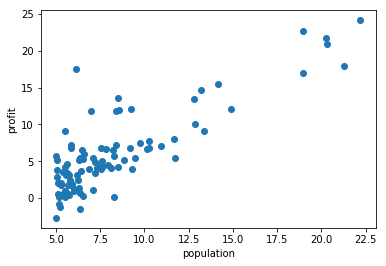

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#shape = (97, 2)
data = pd.read_csv('ex1data1.txt', header=None)

plt.scatter(data[0], data[1])
plt.xlabel('population')
plt.ylabel('profit')
plt.show()

Data preparation

In [2]:
import numpy as np
# Now we want to have our hypothesis function: h_theta = theta' * x

#creating a cols of ones
ones = np.ones((len(data[0]), 1), float)

#input
X = pd.concat([pd.DataFrame(ones), pd.DataFrame(data[0])], axis=1).values

#label
y = data[1].values

Defining cost function

In [3]:
def computeCost(X, y, theta):
    m = X.shape[0]
    h = X.dot(theta)
    J = (1/(2*m)) * (np.sum(np.square(h-y)))
    return J
    

In [4]:
theta = np.zeros(2)
cost = computeCost(X, y, theta)
print(cost)

32.0727338775


Defining gradient descent

In [5]:
# run gradient descent
def gradientDescent(X, y, theta, alpha, iterations):
    m = X.shape[0]
    J_history = np.zeros(iterations)
    for iter in np.arange(iterations):
        h = X.dot(theta)
        theta = theta - alpha * (1/m) * X.T.dot(h-y)
        J_history[iter] = computeCost(X, y, theta)
    return (theta, J_history)
    

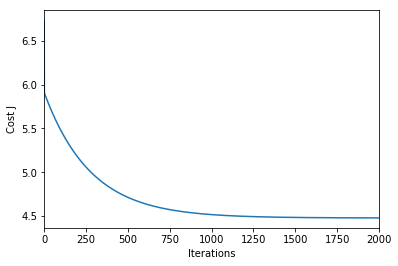

[-3.78806857  1.18221277]


In [6]:
theta = np.zeros(2)
iterations = 2000
alpha = 0.01
theta, J_history = gradientDescent(X, y, theta, alpha, iterations)
plt.xlim(0,iterations)
plt.plot(J_history)
plt.ylabel('Cost J')
plt.xlabel('Iterations')
plt.show()
print(theta)

Now, lets plot fit line on the training data

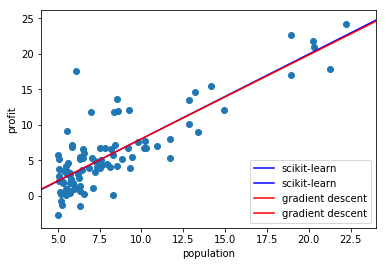

Looks great :D


In [7]:
xs = np.arange(1,25)
ones = np.ones(xs.shape, float)

inputXs = pd.concat([pd.DataFrame(ones),pd.DataFrame(xs)], axis=1).values
outputYs = inputXs.dot(theta)

#trying to compare with Scikit-learn
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X, y)
outputSkLearn = clf.predict(inputXs)

plt.xlim(4,24)
plt.plot(inputXs, outputSkLearn, c='b', label='scikit-learn')
plt.plot(inputXs, outputYs, c='r', label='gradient descent')
plt.legend()
plt.scatter(data[0], data[1])
plt.xlabel('population')
plt.ylabel('profit')
plt.show()

print('Looks great :D')